In [ ]:
# https://www.kaggle.com/code/hojjatk/read-mnist-dataset/notebook
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
from data_loader import MnistDataloader
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = '../input'
training_images_filepath = join(input_path, 'archive/train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'archive/train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 'archive/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 'archive/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

In [1]:
import tensorflow as tf

# Download MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Now x_train, y_train, x_test, y_test contain the training and testing data

2023-12-20 15:02:02.289112: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-20 15:02:02.295152: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-20 15:02:02.330624: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 15:02:02.330658: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 15:02:02.331995: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

11490434/11490434 [==============================] - 17s 1us/step


In [43]:
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np
from sklearn.decomposition import PCA

MNIST contains 784 dimensions. Each sample in x_train is an image. Each image has 28 rows and 28 columns to represent 784 pixels (28*28). So, MNIST images contain 784 dimensions. These need to be reduced (to avoid ["the curse of dimensiontality"](https://en.wikipedia.org/wiki/Curse_of_dimensionality))

In [40]:
print(f"Rows in Image: {len(x_train[0])},\
      \nColumns in Image: {len(x_train[0][0])},\
      \nDimensions (pixels): {len(x_train[0])*len(x_train[0][0])}")

Rows in Image: 28,      
Columns in Image: 28,      
Dimensions (pixels): 784


In [57]:
pca = PCA(n_components=2)

In [64]:
sixty_thou_clusters = pca.fit_transform(X=x_train[0:10000].reshape(-1,28), y=y_train)

ValueError: 'c' argument has 60000 elements, which is inconsistent with 'x' and 'y' with size 280000.

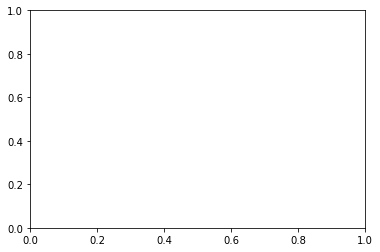

In [69]:
xs = [components[0] for components in sixty_thou_clusters]
ys = [components[1] for components in sixty_thou_clusters]
plt.scatter(xs, ys, c=y_train)

In [27]:
np.set_printoptions(precision=4, suppress=True)

In [28]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

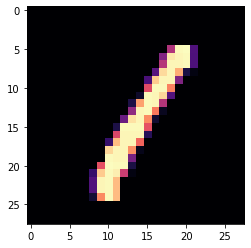

In [14]:
plt.imshow(x_train[3], cmap='magma')